# Introduction
**Sophia and Victoria**
In Ferguson Missouri the Summer 2014, an unarmed black teenager was shot 6 times and subsequently died from his wounds. The white officer was bot indicted by a grand jury 3 months later. 

The initial incident and the following decision incited both a physical firestorm as the streets of Ferguson were filled with fires and protests, and virtually through social media as people from around the world weighed in. 

This project explores the phenomenon of social media activism, news sharing, and the relationship between the virtual and physical world through analysis of 13 million tweets over the two weeks following the shooting, and 15 million tweets about the indictment decision in the two weeks following.

# Importing everthing!
Let's get ready to do some cool data things!

In [59]:
% matplotlib inline
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

import cartopy.crs as ccrs
from ipywidgets import widgets
import matplotlib.cm as cm

from matplotlib import animation
from IPython.display import HTML
from tempfile import NamedTemporaryFile

# Reading in Data
Here, we're using a function that we've developed to read in the data, a certain number of lines at a time. This uses a file of cleaned tweets that can be found...

In [50]:
def ReadToDf(linesAtATime,filepath, max=-1):
    start = time.time()
    df = pd.DataFrame()
    i = 0
    data = [] 
    
    #Open and read in the file
    with open(filepath) as cleanedTweets:
        for tweet in cleanedTweets:
            i += 1
            jsonline = json.loads(tweet)
            data.append(jsonline)
            #aggregate once we've read in the appropriate number of liens
            if (i % linesAtATime == 0):
                print "number of tweets parsed: ", i
                print "total time elapsed: ", time.time() - start
                df = pd.DataFrame(data=data).append(df)
                #reset the data
                data = []
        #Handle the last few tweets
            if (max > 0 and i >= max):
                break
        df = pd.DataFrame(data=data).append(df)
    #return the aggregation
    return df

In [51]:
df = ReadToDf(100000, 'data/cleanedShootingTweets.json')

number of tweets parsed:  100000
total time elapsed:  7.4240489006
number of tweets parsed:  200000
total time elapsed:  9.73035001755
number of tweets parsed:  300000
total time elapsed:  12.7070908546
number of tweets parsed:  400000
total time elapsed:  15.0999009609
number of tweets parsed:  500000
total time elapsed:  18.4125850201
number of tweets parsed:  600000
total time elapsed:  20.9919409752
number of tweets parsed:  700000
total time elapsed:  23.6935780048
number of tweets parsed:  800000
total time elapsed:  27.5096888542
number of tweets parsed:  900000
total time elapsed:  30.5096108913
number of tweets parsed:  1000000
total time elapsed:  33.5821588039
number of tweets parsed:  1100000
total time elapsed:  37.9024338722
number of tweets parsed:  1200000
total time elapsed:  41.3008358479
number of tweets parsed:  1300000
total time elapsed:  44.7999508381
number of tweets parsed:  1400000
total time elapsed:  48.4122829437
number of tweets parsed:  1500000
total time

## Cleaning Data
This is where we're going to clean data that we've read in. 

In [52]:
df.head(10)

,coordinates_x,coordinates_y,created_at,entities_hashtags_text,entities_user_mentions_id_str,entities_user_mentions_screen_name,id_str,retweet_count,retweeted_status_id_str,user_id_str,user_screen_name,user_verified
0,NaN,NaN,Thu Aug 14 14:13:38 +0000 2014,[Ferguson],[18924291],[janetmock],499921796074725376,61,499921550561513472,27945132,justifiedangerr,False
1,NaN,NaN,Thu Aug 14 14:13:38 +0000 2014,[Ferguson],"[79228319, 3002609293]","[StLHandyMan, TheAnonMessage]",499921796205125632,0,None,246303666,AmericasHardt,False
2,NaN,NaN,Thu Aug 14 14:13:38 +0000 2014,[],[],[],499921796247072769,0,None,1871547854,JBayB1,False
3,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[Ferguson],[14280918],[stauffermatt],499921796247076864,917,499778258465198080,303547120,MackDane_,False
4,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[],[164324862],[flemingjude],499921796322574336,2,499914348782161920,44620310,jennyann67,False
5,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[ferguson],[],[],499921796552851456,4,None,168838692,kimmie8264,False
6,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[],[],[],499921796892610560,0,None,164324862,flemingjude,False
7,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[],[2272066354],[ebbonitapplebum],499921797060775936,4,499917343880142849,31260933,Official_Kaikai,False
8,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[],[],[],499921797123678208,0,None,19927439,PRDivas,False
9,NaN,NaN,Thu Aug 14 14:13:39 +0000 2014,[],[],[],499921797165645824,0,None,282584684,AJR5600,False


In [53]:
df['createdDatetime'] =  pd.to_datetime(
    df['created_at'], 
    format = '%a %b %d %H:%M:%S +0000 %Y')

# Number of Tweets over Time - Victoria
Let's first get a handle of the data that we have. In the dataset related to the shooting, we have approximately 13 million tweets worth of data. Over the course of the first week, statements from police, from the family of Michael Brown, statements from the police officer Darren Wilson, and unrest from the streets were recorded and shared wildly across the web. 

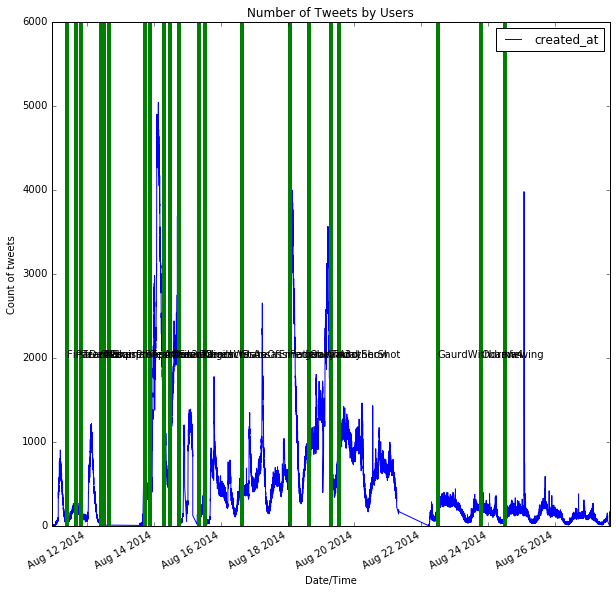

In [54]:
#Raw numbers of tweets over time
users = df.set_index('createdDatetime').groupby([pd.TimeGrouper('Min')]).count().reset_index()

fig, ax = plt.subplots(figsize=(10,10))

users.plot(kind='line', x='createdDatetime', y='created_at', ax=ax)
plt.title('Number of Tweets by Users')

ax.set_ylabel('Count of tweets')
ax.set_xlabel('Date/Time')

#Overlaying Special Events
#August 11, 10AM - first police department demonstration
#August 11, 4PM - parents ask for stop to violence
#August 11, 8PM - tear gas used at protest
#August 12, 10AM - protest in St. Louis
#August 12, 12PM - Al Sharpton addresses crowds
#August 12, 4PM - Obama makes a statement
#August 13, 6PM - Reporters detained
#August 13, 9PM - Tear gas used again, and at reporters
#August 14, 7AM - Antonio French released from jail
#August 14, 11:40AM - Obama Address
#August 14, 6PM - Silent Vigils, first peaceful night
#August 15, 8:45AM - Darren Wilson names
#August 15, 12:30PM - Assassination statement by family
#August 15 Evening - Huge amounts of protest
#August 16, 3PM - State of emergency issued, curfew issued
#August 17 - Afternoon - Federal Autopsy Ordered
#August 18 - 2AM - Federal Gaurd Ordered into town
#August 18 - 3:30PM - third Obama address
#August 18 - Trayvon Martin's mother published letter
#August 19 - 7AM - family on the Today Show
#August 19 - 1PM - another man is shot
#August 22 - 12PM - national gaurd ordered to withdraw
#August 23 - Online fundraisers for officer surpass that of Brown
#August 23 - 7PM - Obama address
#August 24 - 12PM - Private Viewing, Requests for no Violence
#August 25 - Funeral

calendar_dates = {'FirstDemo':datetime(2014,8,11,10,0,0),
                 'ParentReq':datetime(2014,8,11,16,0,0),
                 'TearGas':datetime(2014,8,11,20,0,0),
                 'StLouisProtest':datetime(2014,8,12,10,0,0),
                 'AlSharpton':datetime(2014,8,12,12,0,0),
                 'Obama':datetime(2014,8,12,16,0,0),
                 'Reporters':datetime(2014,8,13,18,0,0),
                 'TearGas2':datetime(2014,8,13,21,0,0),
                 'AntonioFrench':datetime(2014,8,14,7,0,0),
                 'Obama2':datetime(2014,8,14,11,40,0),
                 'SilentVigils':datetime(2014,8,14,18,0,0),
                 'DarrenWilson':datetime(2014,8,15,8,45,0),
                 'CharacterAssassination':datetime(2014,8,15,12,30,0),
                 'StateOfEmergency':datetime(2014,8,16,15,0,0),
                 'FederalGaurd':datetime(2014,8,18,2,0,0),
                 'Obama3':datetime(2014,8,18,15,30,0),
                 'TodayShow':datetime(2014,8,19,7,0,0),
                 'AnotherShot':datetime(2014,8,19,13,0,0),
                 'GaurdWithdrawn':datetime(2014,8,22,12,0,0),
                 'Obama4':datetime(2014,8,23,19,0,0),
                 'Viewing':datetime(2014,8,24,12,0,0)}

for event in calendar_dates:
    plt.axvline(x=calendar_dates.get(event),ymin=0, ymax=4000, linewidth=4,color='g',label=event)
    plt.text(calendar_dates.get(event),2000,event)
plt.show()

Further, a certain percentage of users have place or geoencoding available on their tweets. Spatially we can see how tweets were generated following the shooting.

In [57]:
latLonPopulated = df[(df['coordinates_x'] != 0) & (df['coordinates_y'] != 0)]

In [63]:
def plotAnimationProperly(list_functions, data_to_plot, colors_to_plot):
    for i in range(len(list_functions)):
        list_functions[i].set_data(data_to_plot[i].coordinates_x,data_to_plot[i].coordinates_y)
        list_functions[i].set_color(colors_to_plot[i])

#Note, the animation code courtesy of and adapted from http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [65]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(-180, 180), ylim=(-75, 75))
# plt.axis([-180, 180, -75, 75])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scat, = plt.plot([], [],'o')

# initialization function: plot the background of each frame
def init():
    scat.set_data([], [])
    return scat,


# animation function.  This is called sequentially
def animate(i):
    day = round(i/24) + 17
    hour = i - (day-17)*24
    subset = []
    subset = latLonPopulated[
        (latLonPopulated['createdDatetime'].dt.day == day) & 
        (latLonPopulated['createdDatetime'].dt.hour ==hour)]

    scat.set_data(subset.coordinates_x,subset.coordinates_y)
    
    return scat,

animation.Animation._repr_html_ = anim_to_html
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=48, interval=5000, blit=False)

# call our new function to display the animation
display_animation(anim)

And over all time, statically, this looks like:

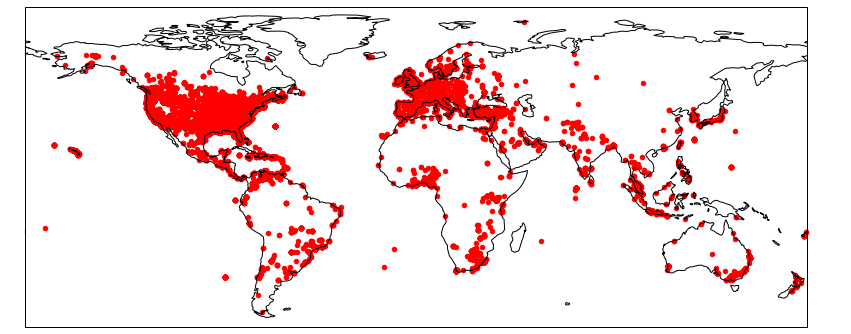

In [67]:
#the cartopy map, going simple outline for now
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#straight-up coordinate data which we just finished recoding
plt.scatter(latLonPopulated.coordinates_x,latLonPopulated.coordinates_y,color='r')

plt.show()

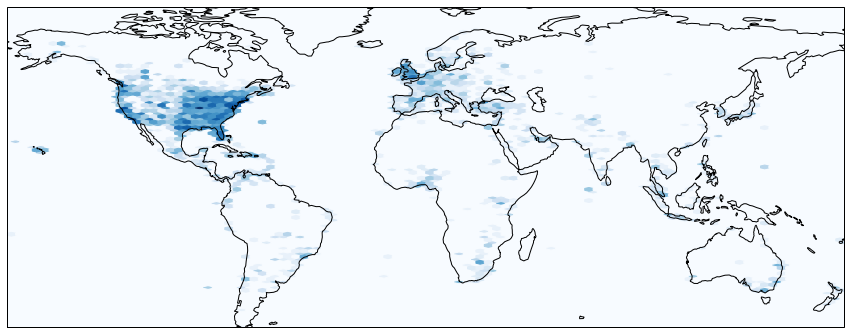

In [74]:
#as a hexbin instead
#the cartopy map, going simple outline for now
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#straight-up coordinate data which we just finished recoding
plt.hexbin(latLonPopulated.coordinates_x,latLonPopulated.coordinates_y,cmap=cm.Blues,bins='log')


In [ ]:
# Zoomed in on the US
#as a hexbin instead
#the cartopy map, going simple outline for now
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#straight-up coordinate data which we just finished recoding
plt.hexbin(latLonPopulated.coordinates_x,latLonPopulated.coordinates_y,cmap=cm.Blues,bins='log')

plt.axis([])

# Hashtags - Sophia
Now, let's explore the different hashtags used by users. First, let's create a dataframe that has one row per tweet-hashtag combination. So, a tweet using two hashtags would translate into a dataframe with two rows. 

We will create this dataframe by looping over the rows in the dataframe, and looping over the hashtags in each tweet. For each tweet, we will create a json object that represents the row that should be added to our new dataframe. 

In [75]:
hashtagRows = []
hashtagMap = {'MICHAELBROWN': 'MIKEBROWN'}
for i,tweet in df.iterrows():
    if (i%1000000 == 0):
        print "Another million closer!"
    for hashtag in tweet['entities_hashtags_text']:
        mappedhashtag = hashtag.upper()
        if (mappedhashtag in hashtagMap):
            mappedhashtag = hashtagMap[mappedhashtag]
        hashtagRows.append({
                'createdDatetime': tweet['createdDatetime'],
                'hashtag': mappedhashtag,
                'tweetId': tweet['id_str'],
                'x': tweet['coordinates_x'],
                'y': tweet['coordinates_y']
            })
print "creating dataframe"
hashtagsDf = pd.DataFrame(hashtagRows)

creating dataframe


In [92]:
hashtagsDf.head(10)

,createdDatetime,hashtag,tweetId,x,y
0,2014-08-14 14:13:38,FERGUSON,499921796074725376,NaN,NaN
1,2014-08-14 14:13:38,FERGUSON,499921796205125632,NaN,NaN
2,2014-08-14 14:13:39,FERGUSON,499921796247076864,NaN,NaN
3,2014-08-14 14:13:39,FERGUSON,499921796552851456,NaN,NaN
4,2014-08-14 14:13:39,FERGUSON,499921797174013952,NaN,NaN
5,2014-08-14 14:13:39,RISEUP,499921797174013952,NaN,NaN
6,2014-08-14 14:13:39,FERGUSON,499921797253726209,NaN,NaN
7,2014-08-14 14:13:39,MEDIABLACKOUT,499921797253726209,NaN,NaN
8,2014-08-14 14:13:39,PRAYFORFERGUSON,499921797253726209,NaN,NaN
9,2014-08-14 14:13:39,FERGUSON,499921797283065857,NaN,NaN


Now that we have a dataframe, let's get the most popular tweets! We will do this by grouping the dataframe by hashtag and then aggregating by count. We'll sort by count, and then transform that information to a list that we can use later. Right now, we'll start by getting the top 10 hashtags and plotting those over time. 

In [77]:
numTopHashtags = 10
popularHashtagsList = (hashtagsDf
                   .groupby('hashtag')
                   .count()
                   .reset_index()
                   .sort_values(by='createdDatetime', ascending=False)['hashtag']
                   .tolist())[0:numTopHashtags]

print(popularHashtagsList)

[u'FERGUSON', u'MIKEBROWN', u'JUSTICEFORMIKEBROWN', u'TCOT', u'GAZA', u'STL', u'HANDSUPDONTSHOOT', u'DARRENWILSON', u'DONTSHOOT', u'UNITEBLUE']


Now that we have the most popular hashtags, let's filter the hashtags dataframe for just those hashtags. 

In [78]:
popularHashtagsDf = hashtagsDf[hashtagsDf.hashtag.isin(popularHashtagsList)]
popularHashtagsDf.head(10)

,createdDatetime,hashtag,tweetId,x,y
0,2014-08-14 14:13:38,FERGUSON,499921796074725376,NaN,NaN
1,2014-08-14 14:13:38,FERGUSON,499921796205125632,NaN,NaN
2,2014-08-14 14:13:39,FERGUSON,499921796247076864,NaN,NaN
3,2014-08-14 14:13:39,FERGUSON,499921796552851456,NaN,NaN
4,2014-08-14 14:13:39,FERGUSON,499921797174013952,NaN,NaN
6,2014-08-14 14:13:39,FERGUSON,499921797253726209,NaN,NaN
9,2014-08-14 14:13:39,FERGUSON,499921797283065857,NaN,NaN
11,2014-08-14 14:13:39,FERGUSON,499921797555712000,NaN,NaN
12,2014-08-14 14:13:39,FERGUSON,499921797585051648,NaN,NaN
13,2014-08-14 14:13:39,FERGUSON,499921797803163649,NaN,NaN


Now, let's count the number of times each hashtag was used in a given minute. To do this, we will group the dataframe by datetime.minute and hashtag and then aggregate by count.

In [79]:
hashtagTimeCounts = (popularHashtagsDf
                     .set_index('createdDatetime')
                     .groupby([pd.TimeGrouper('H'), 'hashtag'])
                     .count()
                     .reset_index())
hashtagTimeCounts.head(10)

,createdDatetime,hashtag,tweetId,x,y
0,2014-08-10 22:00:00,FERGUSON,101,0,0
1,2014-08-10 22:00:00,JUSTICEFORMIKEBROWN,3,0,0
2,2014-08-10 22:00:00,MIKEBROWN,40,0,0
3,2014-08-10 22:00:00,STL,3,0,0
4,2014-08-10 23:00:00,FERGUSON,271,2,2
5,2014-08-10 23:00:00,JUSTICEFORMIKEBROWN,7,0,0
6,2014-08-10 23:00:00,MIKEBROWN,188,0,0
7,2014-08-10 23:00:00,STL,11,0,0
8,2014-08-10 23:00:00,TCOT,3,0,0
9,2014-08-11 00:00:00,FERGUSON,315,3,3


Now that we've gotten the counts for a particular hashtag every minute, let's plot this over time as a line graph.

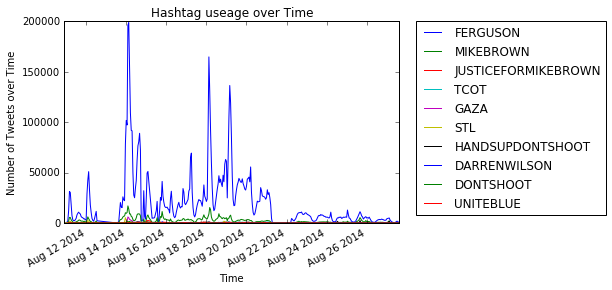

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

for hashtag in popularHashtagsList:
    filteredHashtagTimeCounts = hashtagTimeCounts[hashtagTimeCounts.hashtag == hashtag]
    filteredHashtagTimeCounts.plot(kind = 'line', x = 'createdDatetime', y = 'tweetId', label = hashtag, ax = ax)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time')
plt.ylabel('Number of Tweets over Time')
plt.title('Hashtag useage over Time')

Now, we can see the number of times each hashtag was used in a tweet in this dataset. Unfortunately, it appears that the hashtag "Ferguson" was used much more than any of the other hashtags, so this plot is a little hard to read. To adjust for that, let's "normalize" each hashtag line on this graph. To do this, we will divide the number of times that hashtag was used in any given minute by the maxiumum times that hashtag was used in any minute. This will mean that we can see all the lines on the same set of axes. 

/Users/Sophia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


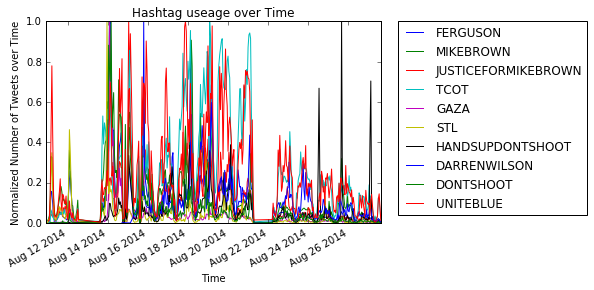

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

for hashtag in popularHashtagsList:
    filteredHashtagTimeCounts = hashtagTimeCounts[hashtagTimeCounts.hashtag == hashtag]
    maxCount = filteredHashtagTimeCounts['tweetId'].max()
    filteredHashtagTimeCounts['normalizedCounts'] = filteredHashtagTimeCounts['tweetId']/maxCount
    filteredHashtagTimeCounts.plot(kind = 'line', x = 'createdDatetime', y = 'normalizedCounts', label = hashtag, ax = ax)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time')
plt.ylabel('Normalized Number of Tweets over Time')
plt.title('Hashtag useage over Time')

We can see that the most popular hashtags seem to follow a similar trajectory. First of all, let's spend a little bit of time talking about what each hashtag means.

**Ferguson:**
This hashtag appears to be refering in a boader context to the events that occured in Ferguson. [source](http://www.dailydot.com/politics/ferguson-michael-brown-eric-garner-black-lives-matter-hashtag-activism/)

**Mike/Michael Brown:**
This hashtag, somewhat self-explanatorily, refers to Michael Brown, the unarmed teen that was shot by police. [source](http://www.dailydot.com/politics/ferguson-michael-brown-eric-garner-black-lives-matter-hashtag-activism/)

**TCOT:**
This hashtag stands for "Top Conservatives on Twitter" and is used to bring together conservatives on twitter. The corresponding liberal hashtag is "P2". [source](http://blog.sfgate.com/ybenjamin/2010/07/27/the-secret-twitter-war-for-americas-independents-tcot-vs-p2/)  Very quickly, after the events in Ferguson, there started to be political discussions about Ferguson. 

**Hands Up Don't Shoot:**
"Hands up Don't Shoot" was a phrase commonly used in the Ferguson protests. This phrase references witness' statements that say that Michael Brown had his hands up before he was shot by police. This phrase was adopted in peaceful protest after the Ferguson shooting [source](http://www.cbc.ca/newsblogs/yourcommunity/2014/08/hands-up-dont-shoot-gesture-spreads-online-in-support-of-ferguson-protesters.html)

**STL:**
This hashtag, similarly to the hashtag "Ferguson" is in reference o the city of Saint Louis, Missouri.  [source](https://tagdef.com/stl)

**Unite Blue:**
Although this hashtag is typically used to refer to "uniting liberals on twitter" [source](), in this context this hashtag refers to people uniting in support of the police force. [source]()

**Ezell Ford: **
Ezell Ford is another African American man that was also killed after being shot by police. He was shot on August 11th, 2014 in LA. [source](https://en.wikipedia.org/wiki/Shooting_of_Ezell_Ford)

**Ferguson Shooting:**
This hashtag, appears to be used to just refer to events surrounding the Ferguson shooting. [source]()

TALK ABOUT THE GRAPH HERE!

We can even see where these hashtags are most popular!

Now, let's also investigate the number of hashtags in support of mike brown vs. the number of hashtags that rallied around the police officer

In [93]:
mikeBrown = ['MIKEBROWN', 'HANDSUPDONTSHOOT','JUSTICEFORMIKEBROWN',
             'DONTSHOOT','P2','POLICESTATE','RIPMIKEBROWN',
             'IFTHEYGUNNEDMEDOWN','JUSTICEFORAARON','POLICEBRUTALITY',
             'RACISM','EZELLFORD','ERICGARNER','BLACKLIVEMATTER','FTP',
             'TLOT', 'WHITEPRIVLEGE','TRAYVONMARTIN','CIVILRIGHTS',
             'HANDSUPFRIDAY', 'ARRESTDARRENWILSON']
darrenWilson = ['TCOT', 'DARRENWILSON', 'UNITEBLUE','TEAPARTY',
                'SUPPORTDARENWILSON', 'GOP']

In [111]:
mikeBrownDf = (hashtagsDf[hashtagsDf.hashtag.isin(mikeBrown)]
               .set_index('createdDatetime')
               .groupby(pd.TimeGrouper('H'))
               .count()
               .reset_index())
darrenWilsonDf = (hashtagsDf[hashtagsDf.hashtag.isin(darrenWilson)]
                  .set_index('createdDatetime')
                  .groupby(pd.TimeGrouper('H'))
                  .count()
                  .reset_index())

In [112]:
mikeBrownDf.head(10)

,createdDatetime,hashtag,tweetId,x,y
0,2014-08-10 22:00:00,43,43,0,0
1,2014-08-10 23:00:00,205,205,0,0
2,2014-08-11 00:00:00,199,199,1,1
3,2014-08-11 01:00:00,398,398,0,0
4,2014-08-11 02:00:00,686,686,4,4
5,2014-08-11 03:00:00,2261,2261,17,17
6,2014-08-11 04:00:00,6158,6158,32,32
7,2014-08-11 05:00:00,6390,6390,46,46
8,2014-08-11 06:00:00,3779,3779,19,19
9,2014-08-11 07:00:00,2452,2452,15,15


In [113]:
darrenWilsonDf.head(10)

,createdDatetime,hashtag,tweetId,x,y
0,2014-08-10 23:00:00,3,3,0,0
1,2014-08-11 00:00:00,2,2,1,1
2,2014-08-11 01:00:00,8,8,0,0
3,2014-08-11 02:00:00,10,10,0,0
4,2014-08-11 03:00:00,77,77,0,0
5,2014-08-11 04:00:00,286,286,0,0
6,2014-08-11 05:00:00,411,411,0,0
7,2014-08-11 06:00:00,231,231,0,0
8,2014-08-11 07:00:00,97,97,0,0
9,2014-08-11 08:00:00,27,27,0,0


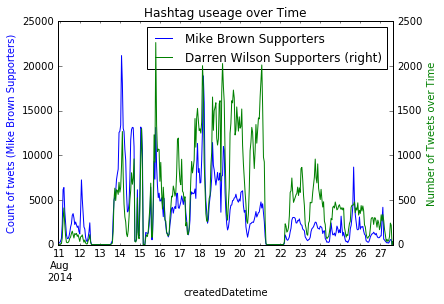

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)

mikeBrownDf.plot(kind='line', x='createdDatetime', y='hashtag', label='Mike Brown Supporters', ax=ax)
darrenWilsonDf.plot(kind='line', x='createdDatetime', y='hashtag', ax = ax, secondary_y=True, label='Darren Wilson Supporters')
plt.title('Number of tweets by Users')

ax.set_ylabel('Count of twets (Mike Brown Supporters)', color='b')
ax.right_ax.set_ylabel('Count of tweets (Darren Wilson Supporters)', color='g')

plt.xlabel('Time')
plt.ylabel('Number of Tweets over Time')
plt.title('Hashtag useage over Time')

So, it appears, that outside of the normal spikes that appear as far as the daily twitter rhythm, it appears that the Mike Brown supporters were vocal on twitter before the Darren Wilson supporters. Additionally, there appear to be about an order of magnitude more Mike Brown supporters than there are Darren Wilson supporters. 

In [115]:
print hashtagsDf.info()
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(-180, 180), ylim=(-75, 75))
# plt.axis([-180, 180, -75, 75])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scat, = plt.plot([], [],'o')
scat_top_1, = plt.plot([], [],'o')
scat_top_2, = plt.plot([], [],'o')
scat_top_3, = plt.plot([], [],'o')
scat_top_4, = plt.plot([], [],'o')
scat_top_5, = plt.plot([], [],'o')
scat_top_6, = plt.plot([], [],'o')
scat_top_7, = plt.plot([], [],'o')
scat_top_8, = plt.plot([], [],'o')
scat_top_9, = plt.plot([], [],'o')

# initialization function: plot the background of each frame
def init():
    scat.set_data([], [])
    scat_top_1.set_data([],[])
    return scat,scat_top_1,scat_top_2,scat_top_3,scat_top_4,scat_top_5,scat_top_6,scat_top_7,scat_top_8,scat_top_9,


# animation function.  This is called sequentially
def animate(i):
    day = round(i/24) + 17
    hour = i - (day-17)*24
    subset = []
    color = []
    label = []
    for j,hashtag in enumerate(popularHashtagsList):
        subset.append(latLonPopulated[
            (hashtagsDf['createdDatetime'].dt.day == day) & 
            (hashtagsDf['createdDatetime'].dt.hour==hour) & 
            (hashtagsDf['hashtag'] == hashtag)])
        color.append(cm.jet(j/float(len(popularHashtagsList))))

    plotAnimationProperly([scat,scat_top_1,scat_top_2,scat_top_3,scat_top_4,scat_top_5,scat_top_6,scat_top_7,scat_top_8,scat_top_9],subset,color)
    
    return scat,scat_top_1,scat_top_2,scat_top_3,scat_top_4,scat_top_5,scat_top_6,scat_top_7,scat_top_8,scat_top_9,

animation.Animation._repr_html_ = anim_to_html
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=48, interval=5000, blit=False)

# call our new function to display the animation
display_animation(anim)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11804270 entries, 0 to 11804269
Data columns (total 5 columns):
createdDatetime    datetime64[ns]
hashtag            object
tweetId            object
x                  float64
y                  float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 540.4+ MB
None


# Users
introduction goes here!

## Verified Users - Sophia
Additionally, one of the things we wanted to investigate was the role that verified users play in raising awareness about a certain event. On twitter verified users are users that represent an organization (like a news source) or a public figure. We hypotheize that getting more verified users involved in talking about social justice will cause more non-verified users to also be engaged in the conversation, as they see what verififed users are saying. 

In [116]:
verified = df[df.user_verified == True]
normal = df[df.user_verified == False]

Now let's find the number of tweets by verified users every minute

In [117]:
groupedVerified = verified.set_index('createdDatetime').groupby([pd.TimeGrouper('Min')]).count().reset_index()
groupedNormal = normal.set_index('createdDatetime').groupby([pd.TimeGrouper('Min')]).count().reset_index()

Now let's plot this information!

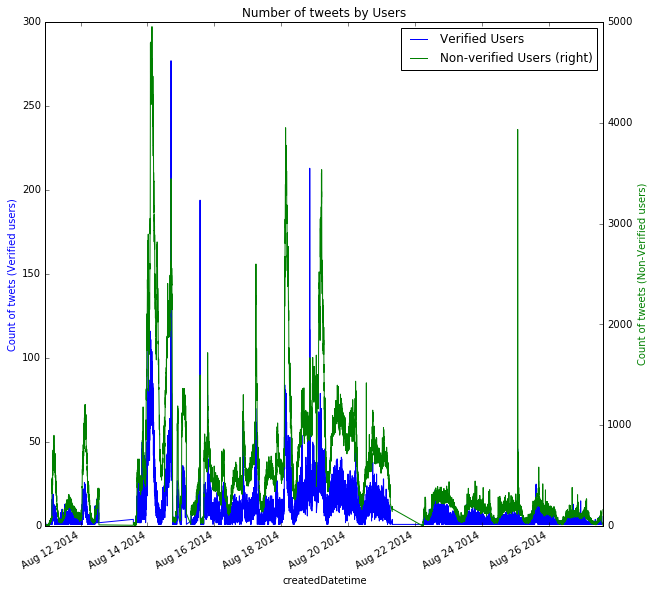

In [118]:
fig, ax = plt.subplots(figsize=(10,10))


groupedVerified.plot(kind='line', x='createdDatetime', y='created_at', label='Verified Users', ax=ax)
groupedNormal.plot(kind='line', x='createdDatetime', y='created_at', ax = ax, secondary_y=True, label='Non-verified Users')
plt.title('Number of tweets by Users')

ax.set_ylabel('Count of twets (Verified users)', color='b')
ax.right_ax.set_ylabel('Count of tweets (Non-Verified users)', color='g')

To see whether or not the number of non-verified users' tweets and number of verified tweets there are are related, let's correlate the number of tweets by verified users and the number of tweets by non-verified users. 

In [119]:
verifiedtweetsCount = groupedVerified.sort_values(by='createdDatetime')['created_at'].tolist()
normaltweetsCount = groupedNormal.sort_values(by='createdDatetime')['created_at'].tolist()

corr = np.correlate(verifiedtweetsCount, normaltweetsCount, mode='full')
delays = range(-len(corr)/2, len(corr)/2)

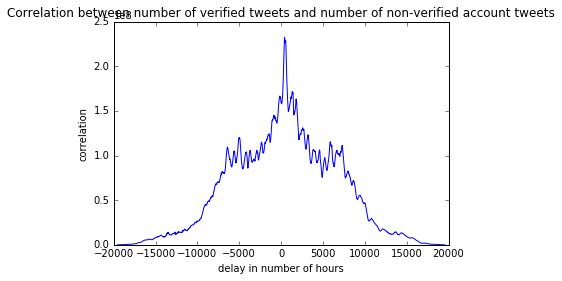

In [120]:
plt.plot(delays,corr)
plt.xlabel('delay in number of hours')
plt.ylabel('correlation')
plt.title('Correlation between number of verified tweets and number of non-verified account tweets')

Now, let's also get the index (in hours) for the highest autocorrelation

In [121]:
delays[np.argmax(corr)]

402

So the correlation of those two vectors finds that they are most correlated when the verifiedTweetsCount and the normalTweets count are offset by 402. This means that about 6.7 hours after an increase/decrease in ____ there tends to also be an increase/decrease in ___.

## Retweets - Victoria

In [122]:
import networkx as nx

In [123]:
def unpack(data):
    try:
        res = data[0]
    except:
        res = 'None'
    return res
df['unpacked_entities'] = df['entities_user_mentions_screen_name'].apply(unpack)

In [ ]:
#WARNING: literally takes forever
plt.figure(figsize=(15,15))
# G=nx.from_pandas_dataframe(df[0:10000:], source='user_id_str',target='unpacked_entities')

G=nx.DiGraph()

#set layout
pos=nx.spring_layout(G)

#add nodes
G.add_nodes_from(df.user_screen_name)
G.nodes()

#create tuples for edges
subset = df[['user_screen_name','unpacked_entities']][0:100:]
tuples = [tuple(x) for x in subset.values]

#add edges
G.add_edges_from(tuples)
G.number_of_edges()

#draw graph
G.remove_node('None')
nx.draw_networkx(G)
plt.show()

## Users in Both Data Sets - Victoria